In [69]:
# Credit Card Approval Prediction - Machine Learning Project
# Author: Mathias Damian Ortiz Sanabria (https://github.com/MathiasOrtiz)
# License: MIT (See LICENSE file for details)

# 📌 Credit Card Approval Prediction
This project uses Machine Learning and Deep Learning to predict whether a credit card application will be approved or not.  
Several classification models were tested, including:
- **K-Nearest Neighbors (KNN)**
- **Random Forest**
- **XGBoost**
- **Neural Network (MLP with Keras/TensorFlow)**

The best model found was **Random Forest**, due to its higher accuracy and better generalization capability.

📊 **Notebook Structure:**
1. **Data loading and exploration**
2. **Preprocessing and outlier treatment**
3. **Training Machine Learning models**
4. **Model evaluation and comparison**
5. **Implementation of a Neural Network**
6. **Conclusions and final selected model**

# 📌 Credit Card Approval Prediction
Este proyecto utiliza Machine Learning y Deep Learning para predecir si una solicitud de tarjeta de crédito será aprobada o no.  
Se probaron varios modelos de clasificación como:
- **K-Nearest Neighbors (KNN)**
- **Random Forest**
- **XGBoost**
- **Red Neuronal (MLP con Keras/TensorFlow)**

El mejor modelo encontrado fue **Random Forest**, debido a su mayor precisión y mejor capacidad de generalización.

📊 **Estructura del Notebook:**
1. **Carga y exploración de datos**
2. **Preprocesamiento y tratamiento de outliers**
3. **Entrenamiento de modelos de Machine Learning**
4. **Evaluación de modelos y comparación**
5. **Implementación de una Red Neuronal**
6. **Conclusiones y modelo final seleccionado**


In [28]:
# I start by importing pandas
import pandas as pd
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/Credit_card.csv')
print(df.head())

   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

In [29]:
#Checking for missing values
print(df.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [30]:
# I don't have any missing values
# Checking for duplicates
print(df.duplicated().sum())

0


In [31]:
# I don't have any duplicates
# Reviewing the data types
print(df.dtypes)

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object


In [32]:
# Everything looks good
# Checking for inconsistent data in the dataset
print(df['Industry'].unique())

['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']


In [33]:
print(df['Ethnicity'].unique())

['White' 'Black' 'Asian' 'Latino' 'Other']


In [34]:
print(df['Citizen'].unique())

['ByBirth' 'ByOtherMeans' 'Temporary']


In [35]:
# Everything looks good

# Visualizing the data

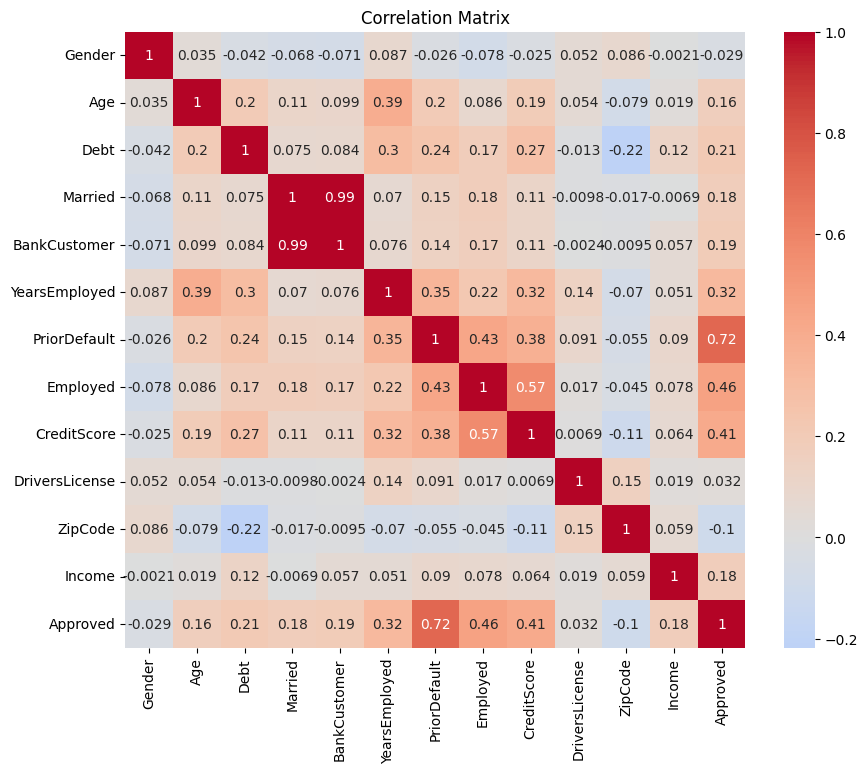

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix

The correlation matrix displays the relationship between variables in the dataset. Correlation values range from -1 to 1:
- Positive values close to 1: Indicate a strong positive correlation, meaning that when one variable increases, the other tends to increase as well.
- Negative values close to -1: Indicate a strong negative correlation, meaning that when one variable increases, the other tends to decrease.
- Values close to 0: Indicate a weak correlation, meaning that the relationship between the variables is not strong.

In this case: 
1. Approved(Target variable):
- It has a strong positive correlation with PriorDefault.
- Moderate correlation with Employed (0.46) and CreditScore (0.41).
- Then weak correlation with Debt (0.21) and Income (0.18), but still exhibit some impact.

2. Independent variables:
- Married and BankCustomer have a strong positive correlation (0.99).
- CreditScore has a moderate correlation with Employed (0.57).

For building a predictive model, we should prioritize variables with a strong correlation with the target variable (Approved).



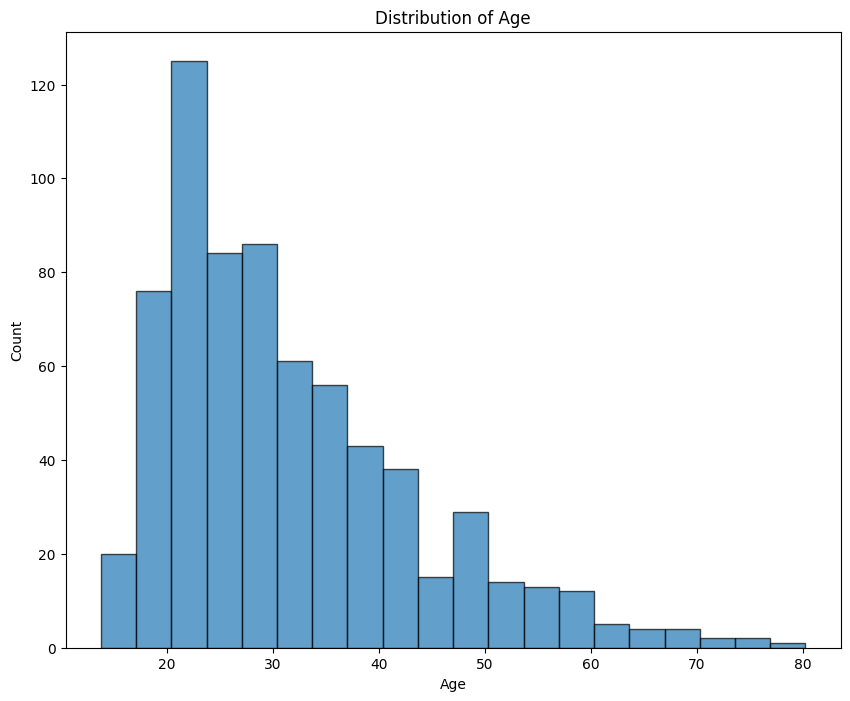

In [37]:
plt.figure(figsize=(10, 8))
plt.hist(df['Age'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

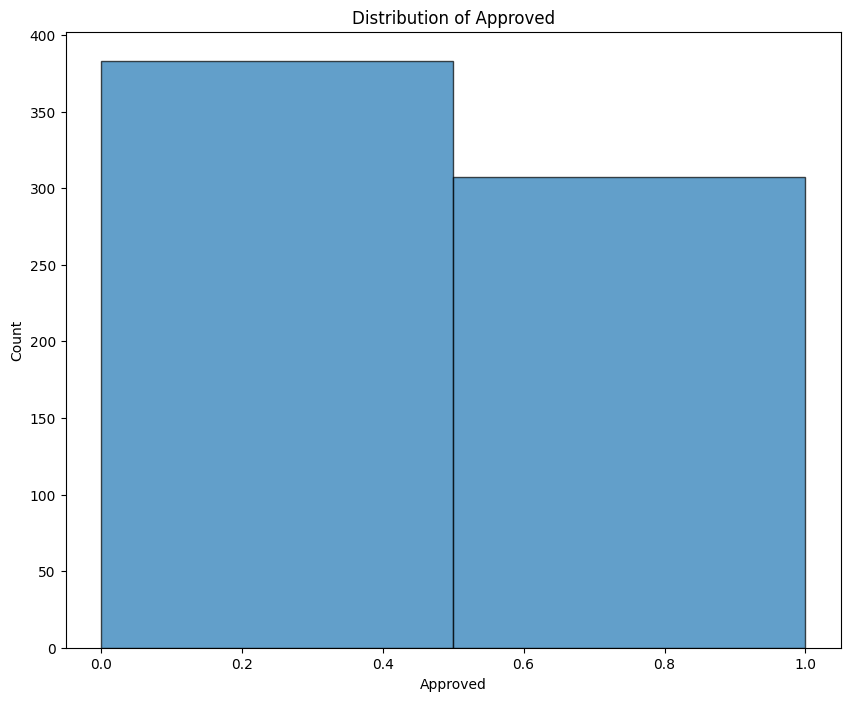

In [38]:
plt.figure(figsize=(10, 8))
plt.hist(df['Approved'], bins = 2, edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Approved')
plt.xlabel('Approved')
plt.ylabel('Count')
plt.show()

In [39]:
fig = px.scatter(df, x = 'Age', y = 'Income', color='Approved', title='Age vs Income')
fig.show()

In [40]:
fig = px.histogram(df, x = 'Income' , title='Distribución de Income')
fig.show()

In [41]:
# Creating box plots to check for outliers

# Using plotly to create box plots
df_selected = df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
for column in df_selected.columns:
    fig = px.box(df, y=column, title=f'Distribution of {column}')
    fig.show()

1. Age

The distribution of Age shows that most individuals fall between 20 and 40 years old, with a median range of 28.46. However, there are a few outliers with very high values, reaching a maximum age of 80.25. I will retain these outliers to ensure the model captures all relevant patterns.

2. Debt

The Debt variable has most values concentrated below 10, with a median of 2.75. However, there are notable outliers above the upper fence of 16.5, with a maximum value of 28. I will use apropriate methods to handle these outliers.

3. YearsEmployed

The YearsEmployed variable demostrates that most individuals have less than 6 years of employment, with a median of 1 year. There is an extreme outlier at 28.5 years, this can represent a long career. I will cap this to avoid skewing the model.

4. CreditScore

Shows that most individuals have a score of 0 to 3, with a median of 0. There are outliers beyond the upper fence of 7, reaching a maximum value of 67. These scores may represent unusual cases. I will use appropriate methods to handle these outliers.

5. Income

The income variable shows a highly skewed distribution, whith most indivuals earning less than 20000 and a median of 5. I will use logarithmic transformation to handle this skewness.

In [42]:
# Starting with Debt
# Checking the type of sesgo
from scipy.stats import skew

debt_skew = skew(df['Debt'])
print(f'Skewness of Debt: {debt_skew}')


Skewness of Debt: 1.4855746179702647


Interpretation:

- Positive skewness (right-skewed, > 0) → The right tail is longer (higher extreme values). Requires logarithmic transformation.
- Negative skewness (left-skewed, < 0) → The left tail is longer (lower extreme values).
- Symmetric distribution (~ 0) → No need to correct the skewness.

In [43]:
# The skewness is more than 0, which means the data is skewed to the right.
# I will use log transformation to correct this
import numpy as np
df['Debt'] = np.log1p(df['Debt'])

In [44]:
# Now I will check the skewness again
debt_skew = skew(df['Debt'])
print(f'Skewness of Debt: {debt_skew}')

Skewness of Debt: 0.1721318192512319


In [45]:
# You can see that the skewness is much closer to 0
# That means that the data is more normal
# Now with YearsEmployed
upper_limit = df['YearsEmployed'].quantile(0.95)
df['YearsEmployed'] = df['YearsEmployed'].apply(lambda x: min(x, upper_limit))

Capping is a technique used to handle outliers by setting upper and/or lower limits on a variable. Instead of removing extreme values, they are replaced with a defined threshold, usually based on percentiles.

In this case, I applied upper capping to YearsEmployed by limiting values above the 95th percentile. This helps reduce the impact of extreme values while preserving the overall distribution of the data. Capping ensures that outliers do not distort the model while keeping meaningful information.

In [46]:
# I will use capping again for CreditScore
upper_limit = df['CreditScore'].quantile(0.95)
df['CreditScore'] = df['CreditScore'].apply(lambda x: min(x, upper_limit))

In [47]:
# I will check the skewness for Income
income_skew = skew(df['Income'])
print(f'Skewness of Income: {income_skew}')

Skewness of Income: 13.112071105201627


In [48]:
# Is more than 0, so I will use log transformation
df['Income'] = np.log1p(df['Income'])

In [49]:
income_skew = skew(df['Income'])
print(f'Skewness of Income: {income_skew}')

Skewness of Income: 0.5092877667184338


In [50]:
# You can see that the skewness is much closer to 0
# That means that the data is more normal

# Data Preparation for Machine Learning 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df1 = df

#Selecting the target variable and separating it
X = df1.drop('Approved', axis = 1) # Select all columns except 'Approved'
y = df1['Approved'] # This is the target variable   

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the pipeline.
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

# Applying transformations based on feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

# Creating the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Model Implementation

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Creating the models
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), # Calling the preprocessing pipeline created above
    ('classifier', LogisticRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Training the models
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

# Making predictions
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

# Evaluating the models
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

# Comparing the accuracy of each model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

# Creating a dictionary to display results easily
results = {
    'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        68
           1       0.84      0.83      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        68
           1       0.93      0.81      0.87        70

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        68
           1       0.78      0.70      0.74        70

    accuracy                           0.75       138
   macro avg  

# Interpretación de los resultados
Viendo los reportes de clasificación, puedo analizar el rendimiento de cada modelo en términos de precisión, recall, F1-score y accuracy.

Comparando los modelos puedo decir que:
- KNN obtuvo un mejor rendimiento con una precisión del 88%.
- El árbol de decisión tuvo el peor desempeño con un 75%.
- Random Forest y XGBoost también muestran buenos resultados con más del 82 % de precisión.

Ahora voy a tratar de optimizar los modelos utilizando GridSearchCV.

# Interpretation of the Results
Based on the classification reports, I can analyze the performance of each model in terms of precision, recall, F1-score, and accuracy.

Model Comparison
- KNN achieved the best performance with an accuracy of 88%.
- Decision Tree had the worst performance with a 75%.
- Random Forest and XGBoost also performed wll, both above 82% accuracy.

Now I will try to optimize the models using GridSearchCV.

In [53]:
# I will try to improve the accuracy of the models (KNN, Random Forest, XGBoost)
from sklearn.model_selection import GridSearchCV
# Parameters 
param_grid_KNN = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

param_grid_RF = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_XGB = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

# GridSearch for each model
grid_KNN = GridSearchCV(pipeline_KNN, param_grid_KNN, cv=5, scoring='accuracy', n_jobs=-1)
grid_RF = GridSearchCV(pipeline_RF, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_XGB = GridSearchCV(pipeline_XGB, param_grid_XGB, cv=5, scoring='accuracy', n_jobs=-1)

# Training the models
grid_KNN.fit(X_train, y_train)
grid_RF.fit(X_train, y_train)
grid_XGB.fit(X_train, y_train)

# Best parameters
print("Best parameters for K-Nearest Neighbors:", grid_KNN.best_params_)
print("Best cross-validated accuracy for K-Nearest Neighbors:", round(grid_KNN.best_score_, 4))

print("Best parameters for Random Forest:", grid_RF.best_params_)
print("Best cross-validated accuracy for Random Forest:", round(grid_RF.best_score_, 4))

print("Best parameters for XGBoost:", grid_XGB.best_params_)
print("Best cross-validated accuracy for XGBoost:", round(grid_XGB.best_score_, 4))

Best parameters for K-Nearest Neighbors: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best cross-validated accuracy for K-Nearest Neighbors: 0.8605
Best parameters for Random Forest: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best cross-validated accuracy for Random Forest: 0.8804
Best parameters for XGBoost: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 50, 'classifier__subsample': 0.6}
Best cross-validated accuracy for XGBoost: 0.8858


In [54]:
# Evaluating the best models
best_KNN = grid_KNN.best_estimator_
best_RF = grid_RF.best_estimator_
best_XGB = grid_XGB.best_estimator_

y_pred_KNN = best_KNN.predict(X_test)
y_pred_RF = best_RF.predict(X_test)
y_pred_XGB = best_XGB.predict(X_test)

print("\nFinal Accuracy on Test Set:")
print("KNN:", accuracy_score(y_test, y_pred_KNN))
print("Random Forest:", accuracy_score(y_test, y_pred_RF))
print("XGBoost:", accuracy_score(y_test, y_pred_XGB))



Final Accuracy on Test Set:
KNN: 0.8333333333333334
Random Forest: 0.8623188405797102
XGBoost: 0.8260869565217391


# Conclusión de la optimización
- Para Random Forest y XGBoost, la optimización no tuvo impacto en X_Test, lo que indica que el modelo ya estaba bien configurado con los valores por defecto.
- Para KNN, la optimización redujo la precisión en X_test, lo que nos dice que los hiperparámetros seleccionados pueden haber reducido su capacidad de generalización.
- Random Forest es el modelo más consistente, con una precisión estable del 86.23 %.

# Conclusion of the Optimization
- For Random Forest and XGBoost, the optimization had no impact on X_test, indicating that the model was already well-configured with the default values.
- For KNN, the optimization reduced accuracy on X_test, suggesting that the selected hyperparameters may have decreased its generalization ability.
- Random Forest is the most consistent model, maintaining a stable accuracy of 86.23%.

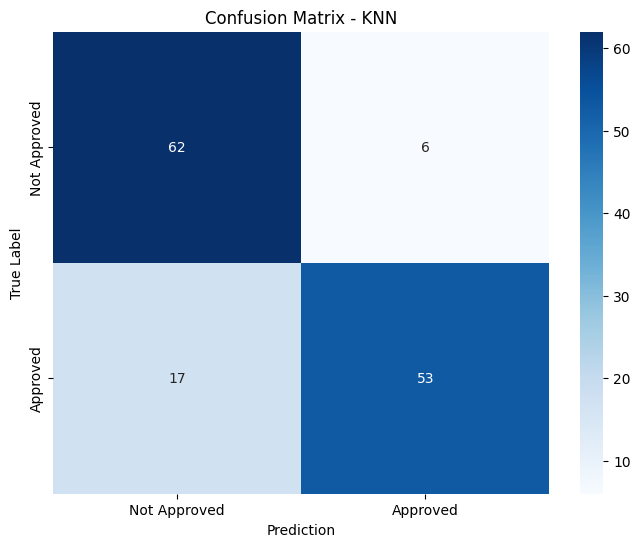

In [56]:
from sklearn.metrics import confusion_matrix
# Confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()


# Interpretación de la matriz de confusión de KNN
- El modelo predijo correctamente 62 casos de 'Not Approved'.
- Predijo correctamente 53 casos de 'Approved' (Verdaderos Positivos).

Puedo decir que:
- El modelo está fallando más al identificar casos de aprobación (17 falsos negativos).
- El modelo rara vez aprueba erróneamente un caso que debería ser rechazado.

# Interpretation of the KNN Confusion Matrix
- The model correctly predicted 62 cases of 'Not Approved'.
- It correctly predicted 53 cases of 'Approved' (True Positives).

I can also say that:
- The model is failing more when identifying approval cases (17 false negatives).
- The model rarely approves a case that should have been rejected.

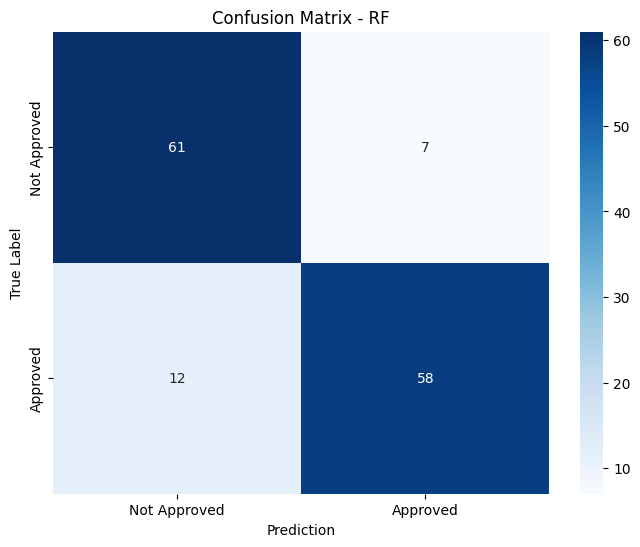

In [58]:
from sklearn.metrics import confusion_matrix
# Confusion matrix for Random Forest
cm_RF = confusion_matrix(y_test, y_pred_RF)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RF')
plt.show()

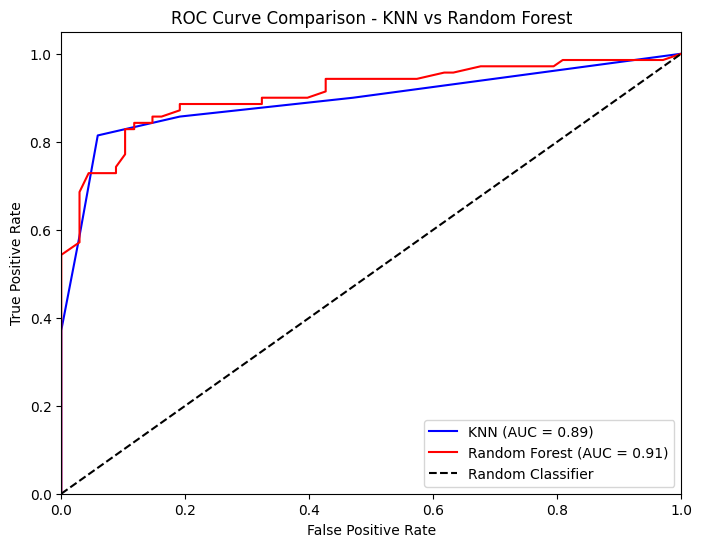

AUC for KNN: 0.8936974789915966
AUC for Random Forest: 0.9096638655462185


In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtain prediction probabilities for KNN and Random Forest
y_pred_prob_KNN = pipeline_KNN.predict_proba(X_test)[:, 1]  
y_pred_prob_RF = pipeline_RF.predict_proba(X_test)[:, 1] 

# Compute the ROC Curve and AUC for both models
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_pred_prob_KNN)
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_prob_RF)

auc_KNN = roc_auc_score(y_test, y_pred_prob_KNN)
auc_RF = roc_auc_score(y_test, y_pred_prob_RF)

# Graph Settings
plt.figure(figsize=(8, 6))
plt.plot(fpr_KNN, tpr_KNN, label='KNN (AUC = %0.2f)' % auc_KNN, color='blue')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = %0.2f)' % auc_RF, color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - KNN vs Random Forest')
plt.legend(loc="lower right")
plt.show()

# Print AUC values
print("AUC for KNN:", auc_KNN)
print("AUC for Random Forest:", auc_RF)


# Conclusión 1
Si vemos el área bajo la curva:
- Random Forest tiene un AUC de 0.91, que es superior a KNN (0.89). Lo que dice que Random Forest separa mejor las clases y tiene mejor capacidad de discriminación entre 'Approved' y 'Not Approved'

Si vemos la matriz de confusión:
- Random Forest tiene más verdaderos Positivos (58 vs 53) que KNN, lo que significa que aprueba más casos correctamente.
- Random Forest tiene menos falsos negativos, lo que indica que comete menos errores al rechazar aprobaciones.
- KNN tiene menos falsos positivos, pero la diferencia es mínima (6 vs 7)

Entonces:
- El mejor modelo es Random Forest.

# Conclusion 1
If we analyze the area under the curve (AUC):

- Random Forest has an AUC of 0.91, which is higher than KNN (0.89). This indicates that Random Forest separates the classes better and has a stronger ability to discriminate between 'Approved' and 'Not Approved'.

If we analyze the confusion matrix:
- Random Forest has more True Positives (58 vs. 53 in KNN), meaning it correctly approves more cases.
- Random Forest has fewer False Negatives, indicating it makes fewer mistakes when rejecting approvals.
- KNN has fewer False Positives, but the difference is minimal (6 vs. 7).

Therefore:
- The best model is Random Forest.

# Neuronal Network Implementation

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

df2 = df.copy()

X = df2.drop('Approved', axis = 1) # Select all columns except 'Approved'
y = df2['Approved'] # This is the target variable

# Split the data into numerical and categorical variables
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=cat_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 64 neurons
    Dropout(0.4), # Dropout layer with 40% dropout rate
    Dense(32, activation='relu'), # Hidden layer with 32 neurons
    Dropout(0.4), # Dropout layer with 40% dropout rate
    Dense(1, activation='sigmoid')  # Output layer for binary classification with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100


/Users/mathiorti/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4862 - loss: 0.7356 - val_accuracy: 0.7387 - val_loss: 0.5831
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6197 - loss: 0.6340 - val_accuracy: 0.8018 - val_loss: 0.5473
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5876 - val_accuracy: 0.8378 - val_loss: 0.5137
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7042 - loss: 0.5997 - val_accuracy: 0.8378 - val_loss: 0.4786
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7825 - loss: 0.5080 - val_accuracy: 0.8468 - val_loss: 0.4477
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.5163 - val_accuracy: 0.8108 - val_loss: 0.4214
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4615 - val_accuracy: 0.8198 - val_loss: 0.3971
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.4134 - val_accuracy: 0.8378 - val_loss: 0.3

# Model Evaluation

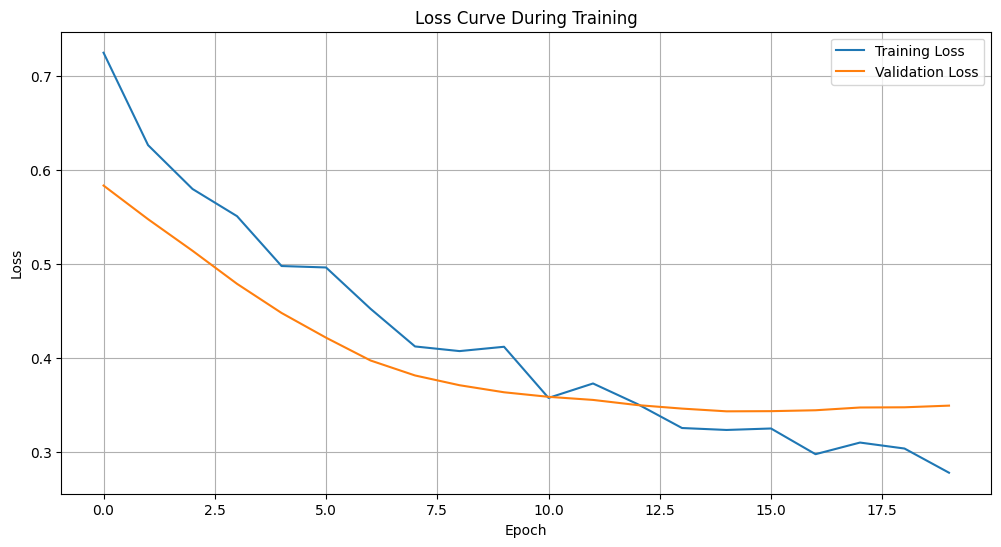

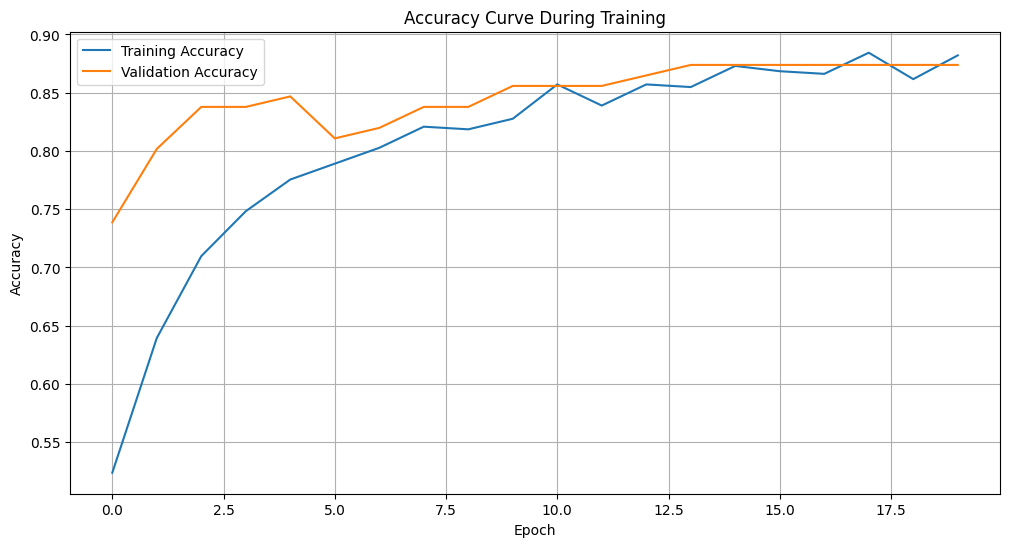

In [66]:
import matplotlib.pyplot as plt
# Plot the loss curve for training and validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy curve for training and validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de la curva de pérdida 
- La pérdida de entrenamiento disminuye de forma constante, esto indica que el modelo está aprendiendo bien.
- La pérdida de validación se estabiliza después de algunas épocas, lo que sugiere que el modelo no está sobreajustando demasiado.
- Como se puede ver, al final, la pérdida de validación empieza a aumentar, esto puede indicar que el modelo ha alcanzado su punto óptimo y seguir entrenando no aportaría mejoras.

# Análisis de la curva de precisión
- La precisión en entrenamiento mejora constantemente.
- La precisión en validación también va mejorando, pero se mantiene en torno al 86 %.
- Una pequeña brecha entre ambas curvas sugiere que hay un ligero sobreajuste.

# Loss Curve Analysis
- The training loss decreases steadily, indicating that the model is learning well.
- The validation loss stabilizes after a few epochs, suggesting that the model is not overfitting excessively.
- As seen at the end, the validation loss starts to increase, which may indicate that the model has reached its optimal point, and continuing training would not bring further improvements.

# Accuracy Curve Analysis
- The training accuracy improves consistently.
- The validation accuracy also improves but stabilizes around 86%.
- A small gap between both curves suggests a slight overfitting.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


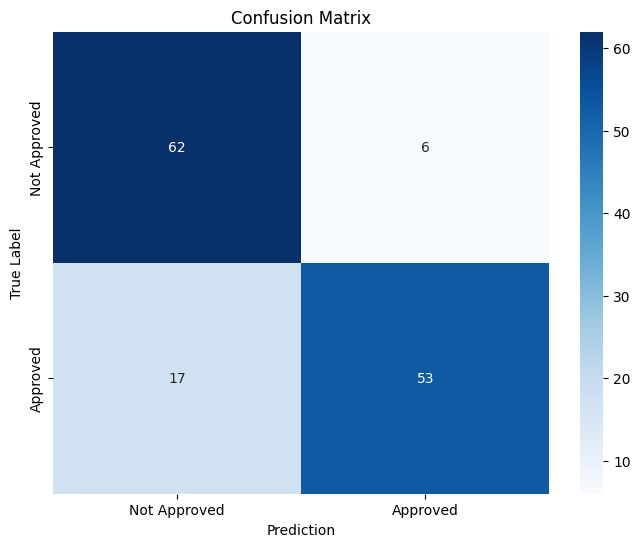

Classification Report:
              precision    recall  f1-score   support

Not Approved       0.78      0.91      0.84        68
    Approved       0.90      0.76      0.82        70

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138



In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print("Classification Report:")
print(report)

# Análisis de la matriz de Confusión
- 62 Verdaderos Negativos, 6 Falsos Positivos.
- 53 Verdaderos Positivos, 17 Falsos Negativos.
Puedo decir que:

- El modelo comete más errores al rechazar casos válidos que al aprobar incorrectamente.
- Tiene baja cantidad de falsos positivos, lo que indica que no aprueba muchas solicituces incorrectamente.
# Confusion Matrix Analysis
- 62 True Negatives, 6 False Positives.
- 53 True Positives, 17 False Negatives.
I can conclude that:

- The model makes more mistakes rejecting valid cases than incorrectly approving them.
- It has a low number of false positives, indicating that it does not approve many applications incorrectly.

# Conclusión Final
- Random Forest supera a la Red Neuronal en precisión, eso me dice que generaliza mejor.
- Random Forest tiene más verdaderos positivos y menos falsos negativos que la Red Neuronal. Esto sugiere que Random Forest es más confiable al aprobar solicitudes, sin rechazar tantas válidas como la Red Neuronal.
- La Red Neuronal muestra pequeños signos de sobreajuste. Random Forest, mantiene una precisión estable. Me dice que Random Forest es más robusto y no requiere ajustes adicionales.

El mejor modelo para este problema es el Random Forest.

# Final Conclusion
- Random Forest outperforms the Neural Network in accuracy, indicating that it generalizes better.
- Random Forest has more true positives and fewer false negatives than the Neural Network. This suggests that Random Forest is more reliable in approving applications, rejecting fewer valid ones compared to the Neural Network.
- The Neural Network shows slight signs of overfitting, while Random Forest maintains stable accuracy. This indicates that Random Forest is more robust and does not require additional adjustments.

The best model for this problem is Random Forest.